# **PRINCIPLE COMPONENT ANALYSIS** | Sklearn 

## **1. PCA FOR DATA VISUALIZATION**

In [1]:
import pandas as pd

from sklearn.datasets import load_iris  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

### 1.1 LOAD DATA

In [2]:
# load iris dataset
iris = load_iris()

# store matrix with data and target values as X and y\n",
X = iris.data
y = iris.target

### 1.2 STANDARIZE DATA

PCA is effected by scale so it is very important to scale features before applying PCA. For this task we can use StandardScaler to standarize dataset features onto unit scale (mean=0, variance=1) which is a requirement for the optimal performance of many machine learning algorithms.

In [3]:
# Standardizing the features
X = StandardScaler().fit_transform(X)

### 1.3 PCA PROJECTION TO 2D

The original data has 4 columns (sepal length, sepal width, petal length, and petal width). In this section, the code projects the original data which is 4 dimensional into 2 dimensions. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [4]:
# initiate the model
pca = PCA(n_components=2)

# fit the model
principalComponents = pca.fit_transform(X)

# create DataFrame with new components
principalDf = pd.DataFrame(data=principalComponents, 
                           columns=['Principal Component 1', 'Principal Component 2'])
principalDf.head()

,Principal Component 1,Principal Component 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


### 1.4 VISUALIZE 2D PROJECTION

In [5]:
# concatenate with target values
finalDf = pd.concat([principalDf, pd.DataFrame(y, columns=['target'])], axis = 1)
finalDf.head()

,Principal Component 1,Principal Component 2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


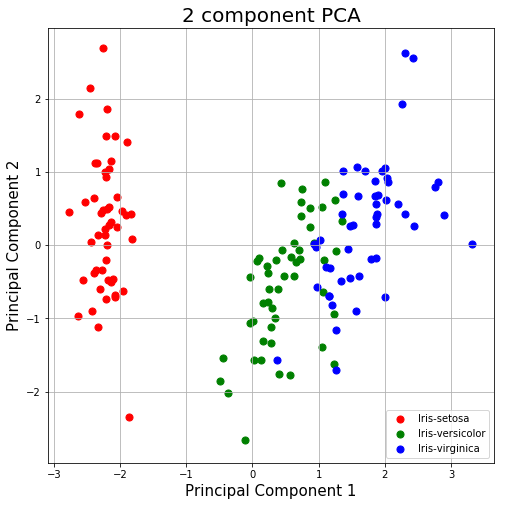

In [6]:
# plot results
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets_name = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
targets = [0, 1, 2]
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1']
               , finalDf.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(targets_name)
ax.grid()

### 1.5 EXPLAINED VARIANCE

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

In [7]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

## **2. PCA TO SPEED-UP ML ALGORITHMS**

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

### 2.1 LOAD DATA

In [9]:
# import MNIST dataset
mnist = datasets.load_digits()

### 2.2 PREPARE DATA

In [10]:
# split data for train and test
X_train, X_test, Y_train, Y_test = train_test_split( mnist.data, 
                                                    mnist.target, 
                                                    test_size=1/7.0, 
                                                    random_state=0)

### 2.3 STANDARIZE DATA

In [11]:
# initiate the model
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 2.4 APPLY PCA
Notice the code below has .95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [12]:
# Make an instance of the Model
pca = PCA(.95)

# Fit the model
pca.fit(X_train)

# Apply transformation to training and testing set
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

### 2.5 APPLY LOGISTIC REGRESSION TO TRANSFORMED DATA

In [13]:
# Make instance of the model
logisticRegr = LogisticRegression(solver = 'lbfgs')

# learn the model
logisticRegr.fit(X_train, Y_train)

# Predict for One Observation (image)
logisticRegr.predict(X_test[0].reshape(1,-1))

array([2])

In [14]:
# Predict for One Observation (image)
logisticRegr.predict(X_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [15]:
# calculate accuracy
logisticRegr.score(X_test, Y_test)

0.9571984435797666